In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

C:\Users\Bright\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Getting Stock Data

In [2]:
start_date = datetime(2012,1,1)
end_date = datetime(2017,1,1)

In [3]:
tesla = wb.DataReader('TSLA',data_source='yahoo',start=start_date,end=end_date)
ford = wb.DataReader('F',data_source='yahoo',start=start_date,end=end_date)
gm = wb.DataReader('GM',data_source='yahoo',start=start_date,end=end_date)

In [4]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [5]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192


In [6]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


### Visual Code

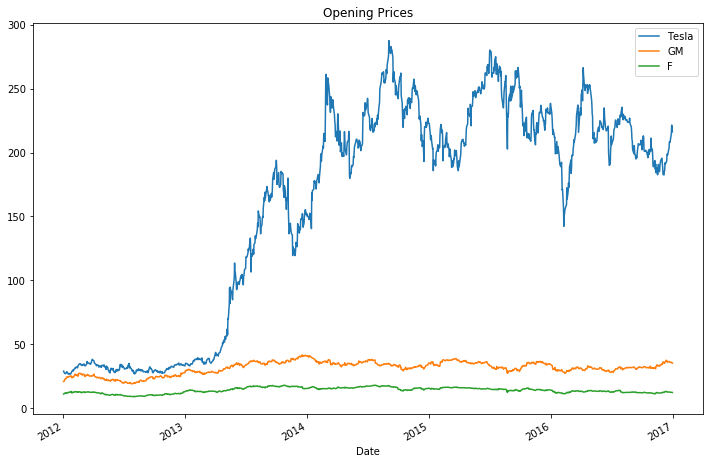

In [7]:
tesla['Open'].plot(label='Tesla',figsize=(12,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='F')
plt.legend();

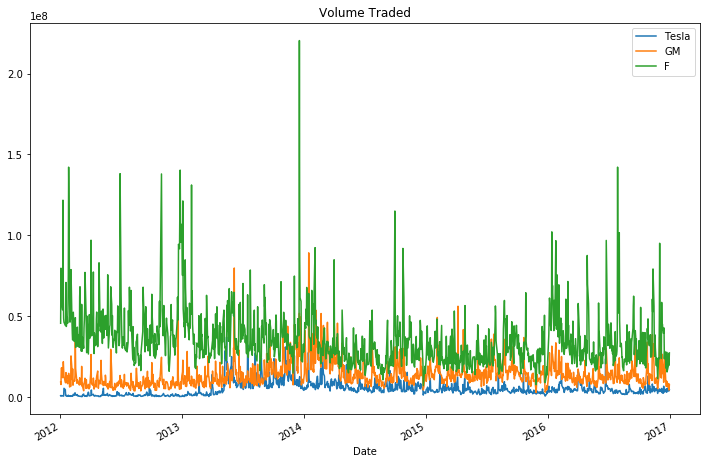

In [8]:
tesla['Volume'].plot(label='Tesla',figsize=(12,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='F')
plt.legend();

In [9]:
(ford['Volume'].max())

220363000.0

In [10]:
ford['Volume'].argmax()   # how on earth do we get the timestamp 

493

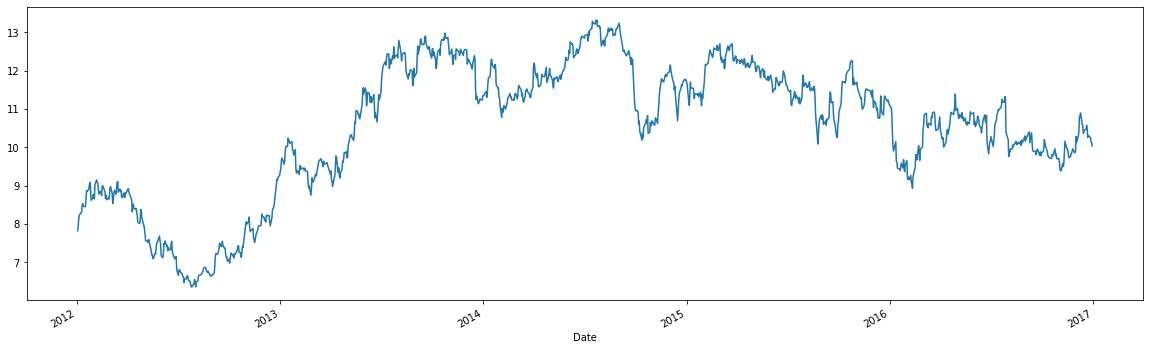

In [11]:
ford['Adj Close'].plot(figsize=(20,6));

In [12]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

In [13]:
tesla.head()  

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07


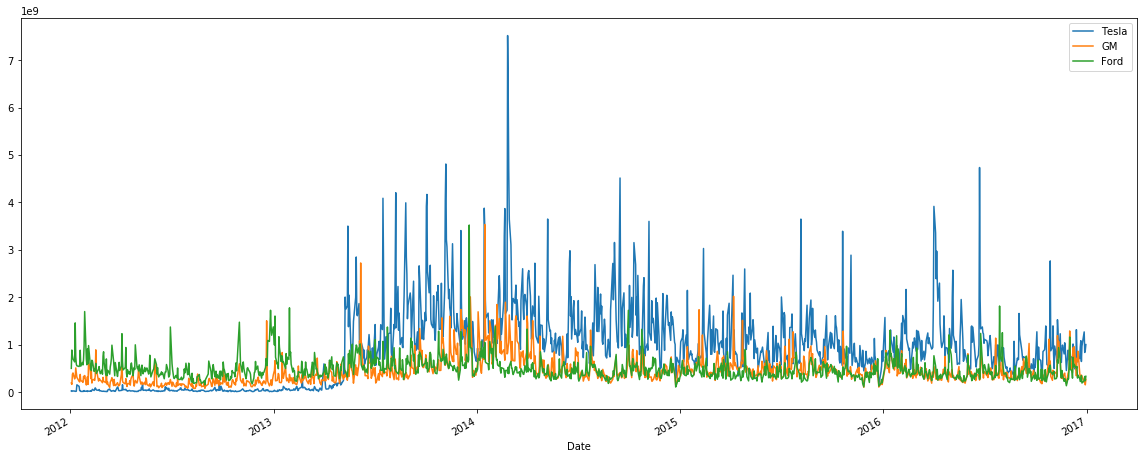

In [14]:
tesla['Total Traded'].plot(figsize=(20,8),label='Tesla')
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

In [15]:
tesla['Total Traded'].max()

7516791000.0

In [16]:
 tesla.loc[tesla['Total Traded'] == tesla['Total Traded'].max()]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2014-02-25,259.200012,228.449997,230.0,248.0,32681700,248.0,7.516791e+09


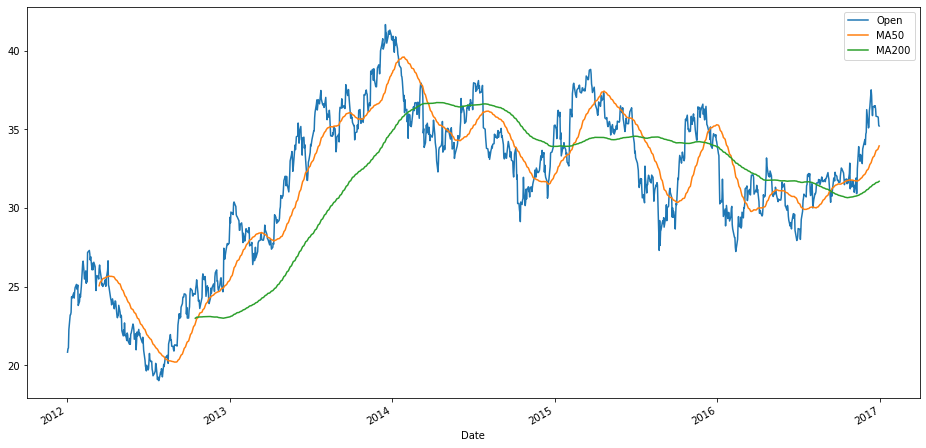

In [17]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8));

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [20]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open' ]

In [21]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


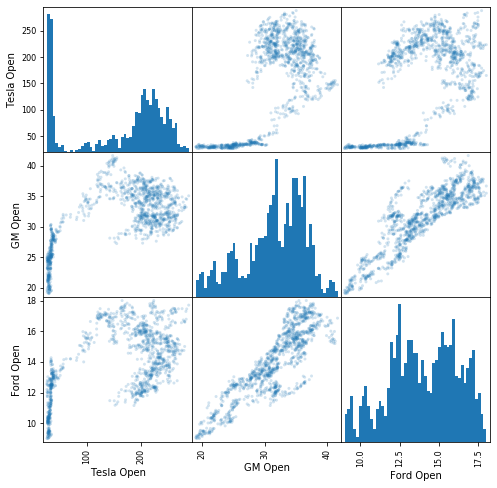

In [22]:
scatter_matrix(car_comp,figsize=(8,8), alpha=0.2,hist_kwds={'bins':50});

#### Part Two

In [23]:
import mplfinance as mpf

In [24]:
from mplfinance import *
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY 

In [25]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252,5.028089e+08
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743,8.889359e+08
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585,7.690521e+08
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934,7.025298e+08
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192,6.386011e+08


In [26]:
ford_reset = ford.loc['2012-01'].reset_index()

ford_reset

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252,5.028089e+08
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743,8.889359e+08
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585,7.690521e+08
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934,7.025298e+08
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192,6.386011e+08
5,2012-01-10,12.05,11.63,12.00,11.80,121750600.0,8.294192,1.461007e+09
6,2012-01-11,12.18,11.65,11.74,12.07,63806000.0,8.483976,7.490824e+08
7,2012-01-12,12.18,11.89,12.16,12.14,48687700.0,8.533181,5.920424e+08
8,2012-01-13,12.08,11.84,12.01,12.04,46366700.0,8.462890,5.568641e+08
9,2012-01-17,12.26,11.96,12.20,12.02,44398400.0,8.448833,5.416605e+08


In [27]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          20 non-null     datetime64[ns]
 1   High          20 non-null     float64       
 2   Low           20 non-null     float64       
 3   Open          20 non-null     float64       
 4   Close         20 non-null     float64       
 5   Volume        20 non-null     float64       
 6   Adj Close     20 non-null     float64       
 7   Total Traded  20 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.4 KB


In [28]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [29]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.823252,5.028089e+08,734505.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.942743,8.889359e+08,734506.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.146585,7.690521e+08,734507.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.230934,7.025298e+08,734508.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.294192,6.386011e+08,734511.0


In [30]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']

ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [31]:
ford_values

[(734505.0, 11.0, 11.25, 10.989999771118164, 11.130000114440918),
 (734506.0,
  11.149999618530273,
  11.529999732971191,
  11.069999694824219,
  11.300000190734863),
 (734507.0,
  11.329999923706055,
  11.630000114440918,
  11.239999771118164,
  11.59000015258789),
 (734508.0,
  11.739999771118164,
  11.800000190734863,
  11.520000457763672,
  11.710000038146973),
 (734511.0,
  11.829999923706055,
  11.949999809265137,
  11.699999809265137,
  11.800000190734863),
 (734512.0, 12.0, 12.050000190734863, 11.630000114440918, 11.800000190734863),
 (734513.0,
  11.739999771118164,
  12.180000305175781,
  11.649999618530273,
  12.069999694824219),
 (734514.0,
  12.15999984741211,
  12.180000305175781,
  11.890000343322754,
  12.140000343322754),
 (734515.0,
  12.010000228881836,
  12.079999923706055,
  11.84000015258789,
  12.039999961853027),
 (734519.0,
  12.199999809265137,
  12.260000228881836,
  11.960000038146973,
  12.020000457763672),
 (734520.0, 12.029999732971191, 12.369999885559082

In [32]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DataFormatter('%b %d')
dayFormatter = DateFormatter('%d')

NameError: name 'DataFormatter' is not defined

### BASIC FINANCIAL ANALYSIS

In [34]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

In [35]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford[  'returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [36]:
import seaborn as sns

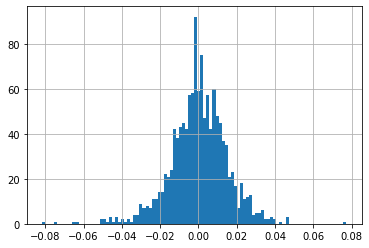

In [37]:
ford['returns'].hist(bins=100);

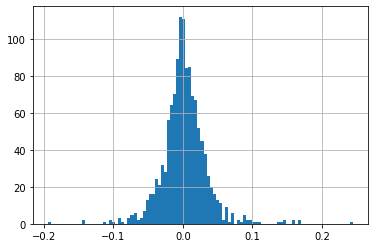

In [38]:
tesla['returns'].hist(bins=100);

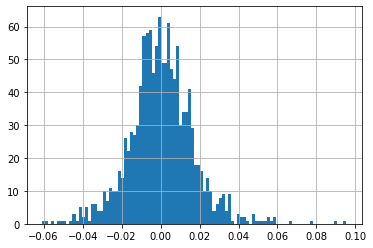

In [39]:
gm['returns'].hist(bins=100);

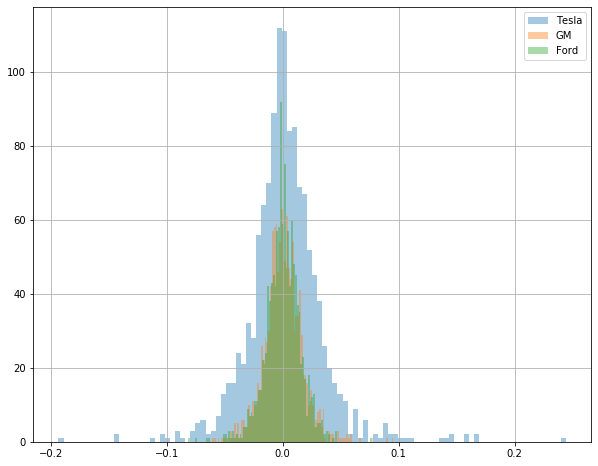

In [40]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
gm['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100,label='Ford',figsize=(10,8),alpha=0.4)

plt.legend();

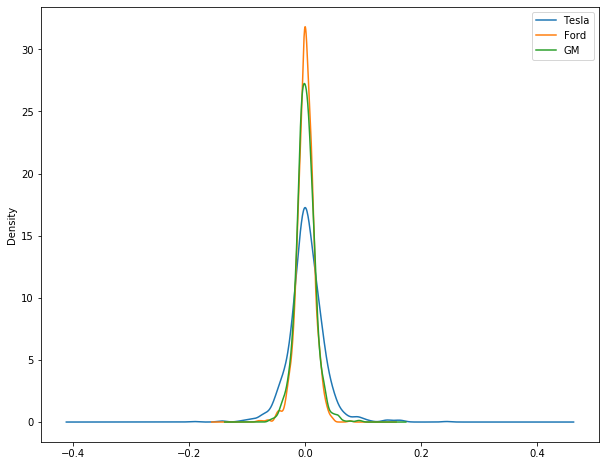

In [42]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
plt.legend();

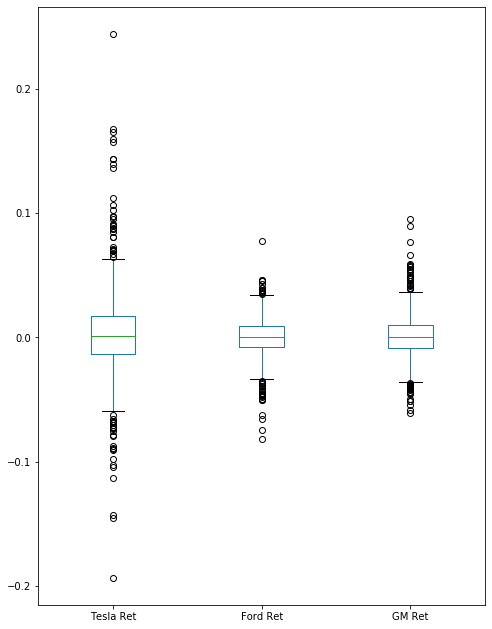

In [43]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Ret','Ford Ret','GM Ret']
box_df.plot(kind='box',figsize=(8,11))

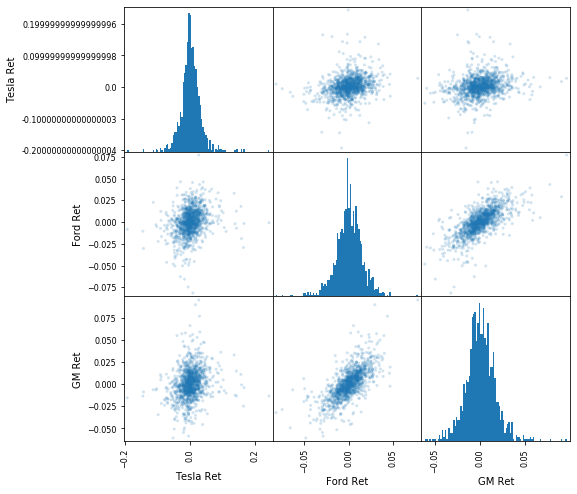

In [44]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

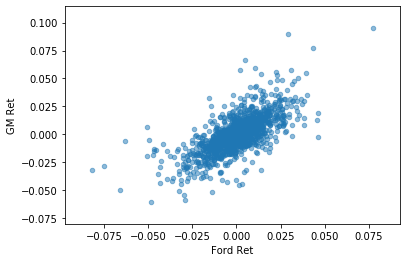

In [46]:
box_df.plot(kind='scatter',x='Ford Ret',y='GM Ret',alpha=0.5);

In [48]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()

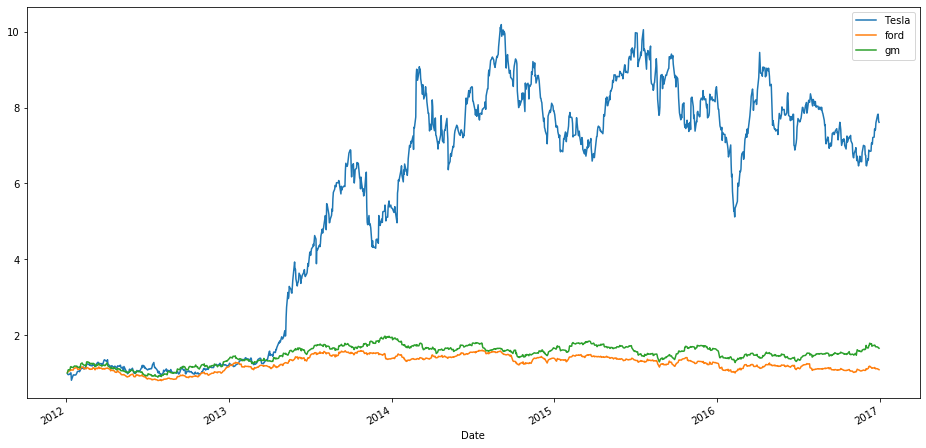

In [52]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='ford')
gm['Cumulative Return'].plot(label='gm')
plt.legend();